# Neural Network - Single Neurone - Atelier 2

## Exercice 1 : Gradient Descent, concepts de base

1. Quel est le rôle du Gradient Descent dans un réseau de neurone ? 

Le Gradient Descent est un algorithme d'optimisation permettant d'ajuster les paramètres d'un réseau de neurone de manière à minimiser la fonction coût utilisée.

2. Comment peut-on utiliser un Gradient Descent dans un réseau de neurone ?

On  peut utiliser un Gradient Descent dans un réseau de neurone :
- En précisant : 
    - Le nombre d'itérations que l'algorithme doit effectuer avant de retourner les valeurs des paramètres du réseau.
    - La valeur du learning rate à utiliser afin de ne pas sauter la valeur minimum de la fonction coût.
- En calculant à chaque itération :
    - les dérivées partielles du fonction coût afin de préciser la direction à suivre.
    - les valeurs des paramètres du réseau de neurone en utilisant les dérivées partielles calculées et le learning rate précisé.
- Et retourner à la fin de la boucle les valeurs trouvées des paramètres du réseau.

## Exercice 2: Cost function

1. Quels sont les différents types de cost functions qu’on peut utiliser dans un algorithme d’apprentissage pour faire la classification ?

- MAE : Mean Absolute Error
- MSE : Mean Squared Error
- Log Loss ou Binary Cross Entropy

2. Comment peut on choisir une cost function ?

On peut choisir une cost function en fonction du type de problème à traiter (regression, classification, ...) et en fonction des valeur du dataset.   

3. Soit le programme #program2 donné en annexe,

- Quelle est la cost function à minimiser : MSE : Mean Squared Error

- Quelles sont les modifications à apporter au code source pour minimiser Mean Absolute Error

`dbias = [1 if i < j else -1 for i, j in zip(y, y_predicted_cls)]
dw = 1 / n_sample * np.dot(X.T, dbias)
dbias = np.mean(dbias)`

- Quelles sont les modifications à apporter au code source pour minimiser binary_crossentropy

`d_bce_W = np.mean(np.dot((-y_train / y_predicted) , X.T)  + np.dot((1 - y_train) / (1 - y_predicted), X.T)) 
d_bce_bias = np.mean((-y_train / y_predicted) + (1 - y_train) / (1 - y_predicted))`

## Exercice 3

1. À l’aide du programme #program1 de l’annexe de l’atelier précédent, générer 100 enregistrements.

In [58]:
def f(x) :
    return -x + 5

In [59]:
def generateData(n) :
    from random import seed
    from random import random
    # generate random numbers between 0-1
    seed(1)
    min = 0
    max = 5
    dataset = []
    for _ in range(n):
        valueX1 = random()
        scaledvalueX1 = min + (valueX1 * (max - min))
        valueX2 = random()
        scaledvalueX2 = min + (valueX2 * (max - min))
        x1 = round(scaledvalueX1, 1)
        x2 = round(scaledvalueX2, 1)
        y0 = f(x1)
        cl = 0
        if(x2 > y0):
            cl = 1
        dataset.append([x1, x2, cl])
    return dataset

In [60]:
dataset = generateData(100)

In [61]:
dataset

[[0.7, 4.2, 0],
 [3.8, 1.3, 1],
 [2.5, 2.2, 0],
 [3.3, 3.9, 1],
 [0.5, 0.1, 0],
 [4.2, 2.2, 1],
 [3.8, 0.0, 0],
 [2.2, 3.6, 1],
 [1.1, 4.7, 1],
 [4.5, 0.2, 0],
 [0.1, 2.7, 0],
 [4.7, 1.9, 1],
 [1.1, 2.1, 0],
 [0.1, 1.1, 0],
 [2.2, 2.5, 0],
 [1.2, 1.2, 0],
 [1.1, 2.3, 0],
 [1.4, 0.1, 0],
 [4.2, 2.8, 1],
 [3.2, 0.9, 0],
 [5.0, 4.3, 1],
 [0.6, 1.7, 0],
 [3.6, 3.6, 1],
 [4.7, 2.1, 1],
 [4.2, 3.4, 1],
 [1.5, 2.9, 0],
 [4.4, 4.2, 1],
 [2.5, 2.9, 1],
 [0.2, 1.2, 0],
 [4.0, 2.1, 1],
 [0.9, 2.7, 0],
 [3.5, 3.4, 1],
 [1.9, 2.2, 0],
 [2.5, 3.9, 1],
 [2.6, 2.0, 0],
 [2.4, 0.1, 0],
 [0.2, 3.5, 0],
 [4.9, 3.0, 1],
 [2.0, 0.9, 0],
 [2.5, 4.9, 1],
 [3.9, 2.7, 1],
 [4.3, 1.2, 1],
 [2.6, 4.8, 1],
 [2.9, 2.3, 1],
 [1.3, 2.7, 0],
 [4.8, 0.0, 0],
 [3.9, 4.1, 1],
 [4.4, 3.7, 1],
 [4.0, 2.6, 1],
 [2.8, 2.1, 0],
 [0.3, 4.4, 0],
 [2.8, 1.0, 0],
 [2.5, 2.4, 0],
 [1.8, 1.7, 0],
 [2.7, 3.1, 1],
 [3.1, 2.3, 1],
 [0.1, 1.1, 0],
 [0.9, 2.9, 0],
 [4.3, 4.0, 1],
 [4.0, 4.1, 1],
 [1.3, 4.2, 1],
 [3.4, 0.4, 0],
 [0.1, 0

In [62]:
import numpy as np
dataset = np.array(dataset)

In [63]:
X = dataset[:, :2]
y = np.array(dataset[:, 2], dtype = int)

2. Tracer les données dans un graphe

In [64]:
def classifyData(dataset) :
    
    dataset = np.array(dataset)
    
    C0 = dataset[:, 2] == 0
    C1 = dataset[:, 2] == 1

    X1_C0 = dataset[:, 0][C0]
    X2_C0 = dataset[:, 1][C0]

    X1_C1 = dataset[:, 0][C1]
    X2_C1 = dataset[:, 1][C1]
    
    return X1_C0, X2_C0, X1_C1, X2_C1

In [65]:
X1_C0, X2_C0, X1_C1, X2_C1 = classifyData(dataset)

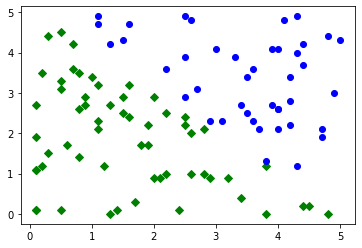

In [66]:
import matplotlib.pyplot as plt
plt.plot(X1_C0, X2_C0, 'gD')
plt.plot(X1_C1, X2_C1, 'bo')
plt.show()

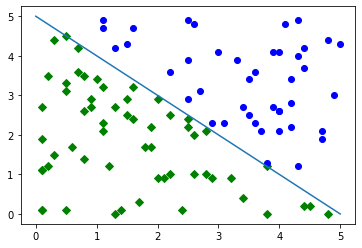

In [67]:
plt.plot(X1_C0, X2_C0, 'gD')
plt.plot(X1_C1, X2_C1, 'bo')
plt.plot([0, 5], [f(0), f(5)])
plt.show()

###### Soit le programme #program2 en annexe
1. Modifier le code source de manière à afficher les éléments suivants à chaque 10000 itérations
- Accuracy
- Loss value (binary_crossentropy)
- W, bias
- L’état du modèle (ligne séparatrice) sous format de graphe comme montré dans l’aperçu ci-dessous
- Mettre en évidence les enregistrements mal classés (surlignés en rouge)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [69]:
X_train.shape

(80, 2)

In [70]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [71]:
def accuracy(y_real, y_predicted) :
    TP = 0
    TN = 0 
    FP = 0 
    FN = 0
    c0 = 0
    c1 = 1
    length = len(y_real)
    for i in range(len(y_real)) :
        if((y_real[i] == y_predicted[i]) & (y_predicted[i] == c1)) :
            TP += 1
        if((y_real[i] == y_predicted[i]) & (y_predicted[i] == c0)) :
            TN += 1
        if((y_real[i] != y_predicted[i]) & (y_predicted[i] == c1)) :
            FP += 1
        if((y_real[i] != y_predicted[i]) & (y_predicted[i] == c0)) :
            FN += 1
    return (TP + TN) / (TP + TN + FP + FN)

In [72]:
def binaryCrossEntropy(y_train, y_predicted_cls) : 
    epsilon = 1e-5
    y_predicted_new = np.array([max (i, epsilon) for i in y_predicted_cls])
    y_predicted_new = np.array([min (i, 1 - epsilon) for i in y_predicted_new])
    bce = - np.mean(y_train * np.log(y_predicted_new) + (1 - y_train) * np.log(1 - y_predicted_new))
    return bce

In [73]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

In [74]:
def predict(bias, W, X):
    linear_model = np.dot(X, W) + bias
    y_predicted = sigmoid(linear_model)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [75]:
def decesionLine(w1, w2, bias, x) :
    slope = -w1 / w2
    y_intercept = -bias / w2
    return slope * x + y_intercept

In [76]:
def verify(dataset, y_predicted_cls) :
    wellClassified = []
    misclassified = []
    for i in range(len(y_predicted_cls)) :
        if y_predicted_cls[i] == dataset[i, 2] :
            wellClassified.append(dataset[i])
        else :
            misclassified.append(dataset[i])
        i += 1
    return wellClassified, misclassified

In [77]:
lr = 0.001
n_iters = 100000
def fit(X,y) :
    bias = 0
    W = np.array([0.,0.])
    n_samples, n_features = X.shape
    j = 0 
    for i in range(n_iters) :
        linear_model = np.dot(X, W) + bias
        y_predicted = sigmoid(linear_model)
        dW = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
        dbias = (1 / n_samples) * np.sum(y_predicted - y)
        W -= lr * dW #ligne12
        bias -= lr * dbias #ligne13
        y_predicted_cls = predict(bias, W, X)
        if i == j * 10000 :
            wellClassified, misclassified = verify(dataset, y_predicted_cls)
            acc = accuracy(y, y_predicted_cls)
            bce = binaryCrossEntropy(y, y_predicted_cls)
            print("Iteration = {}".format(i))
            print("\tbias = {}, w = {}, accuracy = {}, binaryCrossEntropy = {} ".format(bias, W, acc, bce))
            X1_C0, X2_C0, X1_C1, X2_C1 = classifyData(dataset)
            plt.plot(X1_C0, X2_C0, 'gD')
            plt.plot(X1_C1, X2_C1, 'bo')
            X1_C0, X2_C0, X1_C1, X2_C1 = classifyData(misclassified)
            plt.plot(X1_C0, X2_C0, 'gD', mec="red")
            plt.plot(X1_C1, X2_C1, 'bo', mec="red")
            plt.plot([0, 5], [decesionLine(W[0], W[1], bias, 0), decesionLine(W[0], W[1], bias, 5)])
            plt.show()
            j += 1
    return bias,W

Iteration = 0
	bias = -7.500000000000001e-05, w = [0.00026937 0.00021063], accuracy = 0.45, binaryCrossEntropy = 6.332113505758628 


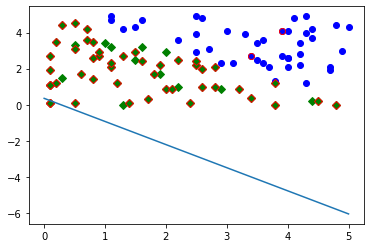

Iteration = 10000
	bias = -1.2324225079741011, w = [0.32477814 0.24216222], accuracy = 0.8625, binaryCrossEntropy = 1.5830358764771575 


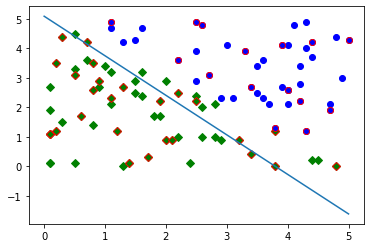

Iteration = 20000
	bias = -2.140643096135903, w = [0.47595757 0.42338527], accuracy = 0.925, binaryCrossEntropy = 0.8634786599193587 


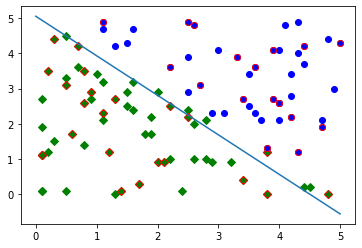

Iteration = 30000
	bias = -2.8499777515723177, w = [0.59709528 0.56479348], accuracy = 0.975, binaryCrossEntropy = 0.2878328866731198 


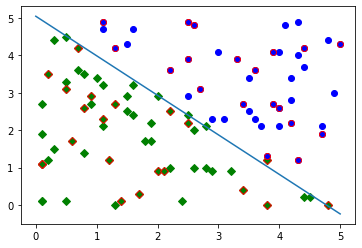

Iteration = 40000
	bias = -3.4351043448304535, w = [0.69914725 0.68096475], accuracy = 1.0, binaryCrossEntropy = 1.0000050000287823e-05 


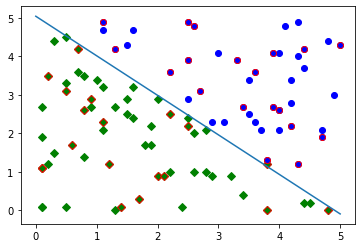

Iteration = 50000
	bias = -3.93615595856319, w = [0.78782968 0.78019269], accuracy = 1.0, binaryCrossEntropy = 1.0000050000287823e-05 


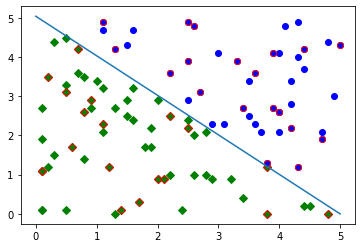

Iteration = 60000
	bias = -4.376574343024261, w = [0.86662462 0.86727899], accuracy = 1.0, binaryCrossEntropy = 1.0000050000287823e-05 


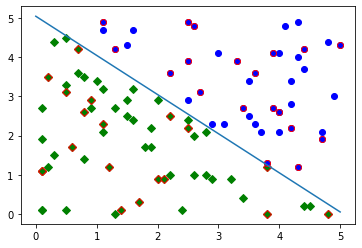

Iteration = 70000
	bias = -4.771117184890687, w = [0.93779813 0.94521846], accuracy = 1.0, binaryCrossEntropy = 1.0000050000287823e-05 


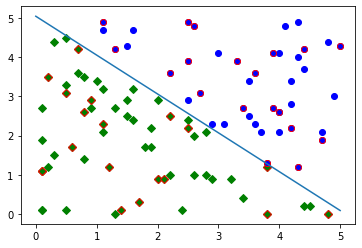

Iteration = 80000
	bias = -5.129653235042686, w = [1.00290447 1.01599903], accuracy = 1.0, binaryCrossEntropy = 1.0000050000287823e-05 


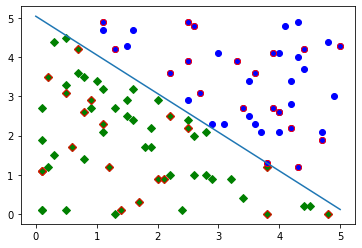

Iteration = 90000
	bias = -5.459106544723965, w = [1.06305589 1.08100761], accuracy = 0.9875, binaryCrossEntropy = 0.14392144336150314 


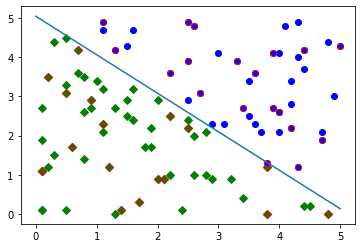

(-5.764496675263932, array([1.11907089, 1.14124555]))

In [78]:
fit(X_train, y_train)